In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import os
import pdb
from astropy.table import QTable
import astropy.units as u
import astropy.constants as const
import math

In [2]:
eqonly_dir = './final_data/runs_eq_only/'
eqorb_dir = './final_data/runs_eqorb/'
eqorbmesc_dir = './eqorbmesc/'

# lets make a ecc distribution
probecc_data = QTable.read('probecc_comma.dat',format='ascii.no_header', names=['ecc','%inbin','cum%'])
planet_data = QTable.read('planets.csv',format='ascii')
rad_data = planet_data['pl_radj'] * (const.R_jup/const.R_earth)



def get_IC_data(n):
    '''
    n = sim number
    '''
    foldername = "%05i"%n
    folderdir = eqorb_dir + foldername
    b_file = open(folderdir + '/b.in','r')
    c_file = open(folderdir + '/c.in','r')
    star_file =open(folderdir + '/star.in','r')
    vpl_file = open(folderdir + '/vpl.in','r')
    b_content = b_file.read()
    c_content = c_file.read()
    star_content = star_file.read()
    vpl_content = vpl_file.read()
    b_content = b_content.split('\n')
    c_content = c_content.split('\n')
    star_content = star_content.split('\n')
    vpl_content = vpl_content.split('\n')
    
    b_ecc_line = 9
    c_ecc_line = 9
    b_rad_line = 5
    c_rad_line = 5
    b_semi_line = 10
    c_semi_line = 10
    b_mass_line = 4
    c_mass_line = 4
    
    b_ecc = b_content[b_ecc_line]
    c_ecc = c_content[c_ecc_line]
    b_ecc = float(b_ecc.split('\t\t')[1])
    c_ecc = float(c_ecc.split('\t\t')[1])
    
    b_rad = b_content[b_rad_line]
    c_rad = c_content[c_rad_line]
    b_rad = float(b_rad.split('\t\t')[1])*-1
    c_rad = float(c_rad.split('\t\t')[1])*-1
    
    b_semi = b_content[b_semi_line]
    c_semi = c_content[c_semi_line]
    b_semi = float(b_semi.split('\t\t')[1])
    c_semi = float(c_semi.split('\t\t')[1])
    
    b_mass = b_content[b_mass_line]
    c_mass = c_content[c_mass_line]
    b_mass = float(b_mass.split('\t\t')[1])*-1
    c_mass = float(c_mass.split('\t\t')[1])*-1
    
    # now to read in atmmassfrac
    
    return b_ecc, c_ecc, b_rad, c_rad, b_semi, c_semi, b_mass, c_mass
    
i = 0
n = 25000
b_ecc_list = np.zeros(shape=(n))
c_ecc_list = np.zeros(shape=(n))
b_rad_list = np.zeros(shape=(n))
c_rad_list = np.zeros(shape=(n))
b_semi_list = np.zeros(shape=(n))
c_semi_list = np.zeros(shape=(n))
b_mass_list = np.zeros(shape=(n))
c_mass_list = np.zeros(shape=(n))

while i <= n-1:
    (b_ecc_list[i], c_ecc_list[i], b_rad_list[i], c_rad_list[i], b_semi_list[i], c_semi_list[i],
     b_mass_list[i], c_mass_list[i]) = get_IC_data(i)
    i += 1

    
# now we have the data
# so lets make it into a histogram and save that shit



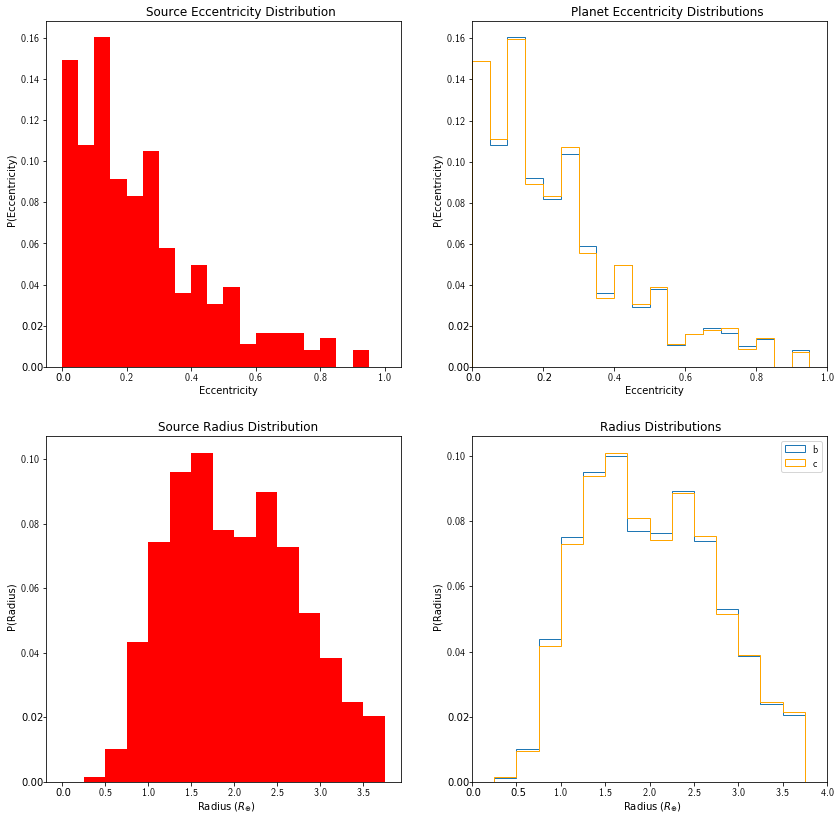

In [3]:
fig,ax = plt.subplots(2,2)
fig.set_size_inches(14,14)
plt.rc('text',usetex=True)

x = np.arange(0,1,0.05)
y = probecc_data['cum%']
ecc_in_bin = probecc_data['%inbin']

x_rad = np.arange(0,4,0.25)

bar = ax[0,0].bar(probecc_data['ecc']+0.025, ecc_in_bin, width=0.05,color='red', label='Source')
ecc_hist_b = ax[0,1].hist(b_ecc_list,bins=x,weights=np.zeros_like(b_ecc_list)+1./b_ecc_list.size,histtype='step', label='b')
ecc_hist_c = ax[0,1].hist(c_ecc_list,bins=x,weights=np.zeros_like(c_ecc_list)+1./c_ecc_list.size,histtype='step',color='orange', label='c')
ax[0,1].set(xlabel='Eccentricity', ylabel='P(Eccentricity)',title='Planet Eccentricity Distributions', xlim=(0,1))
ax[0,0].set(title='Source Eccentricity Distribution',xlabel='Eccentricity',ylabel='P(Eccentricity)')

rad_dist = ax[1,0].hist(rad_data,bins=x_rad,weights=np.zeros_like(rad_data)+1./rad_data.size, color='red', label='Source')
ax[1,0].set(title='Source Radius Distribution', xlabel='Radius ($R_{\oplus}$)', ylabel='P(Radius)')
y_rad = rad_dist[0].cumsum()
rad_b_hist = ax[1,1].hist(b_rad_list,bins=x_rad,weights=np.zeros_like(b_rad_list)+1./b_rad_list.size,histtype='step', label = 'b')
rad_c_hist = ax[1,1].hist(c_rad_list,bins=x_rad,weights=np.zeros_like(c_rad_list)+1./c_rad_list.size,histtype='step',color='orange', label='c')
ax[1,1].set(xlabel='Radius ($R_{\oplus}$)', ylabel='P(Radius)', title='Radius Distributions', xlim=(0,4))
ax[1,1].legend(loc=0)

fig.savefig('./IC_figs/ecc_rad_dist.png');

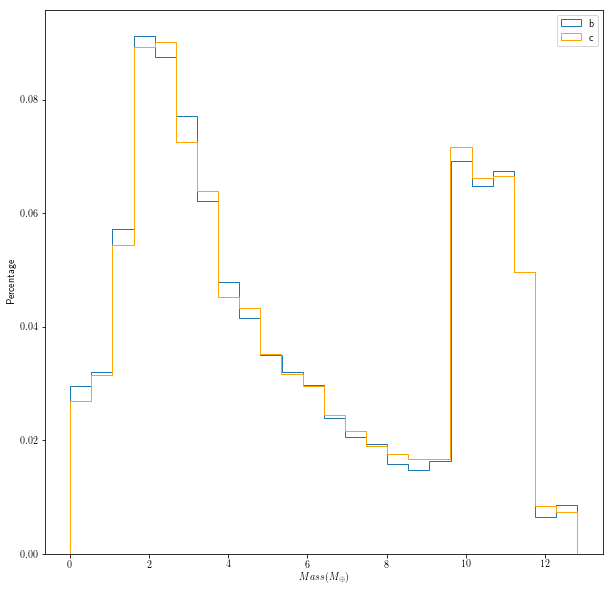

In [4]:
# now lets plot mass
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,10)

bins=24

ax.hist(b_mass_list, bins=bins, weights=np.zeros_like(b_mass_list)+1./b_mass_list.size, histtype='step', label='b')
ax.hist(c_mass_list, bins=bins, weights=np.zeros_like(c_mass_list)+1./c_mass_list.size, color='orange', histtype='step',label='c');
ax.legend(loc=0)
ax.set(xlabel="$Mass(M_{\oplus})$", ylabel="Percentage")

In [9]:
final_data_eqorb = "./final_data/runs_eqorb"
final_data_eqonly = "./final_data/runs_eq_only"

def check_merge(log_dir):
    log_file = open(log_dir+"/log","r")
    log_content = log_file.readlines()
    merge_line = log_content[-3]
    if merge_line[:11] == "HALT: Merge":
        bMerge = 1
    else:
        bMerge = 0    
    return bMerge

def get_merged_data(runs_dir,bAddModule=0):
    '''
    this function is gonna get all the merged data
    '''
    runs_list = np.array([]) # we are going to store the run names in this array
    bad_sim_list = np.array([])
    bMerge_list = np.array([]) # store the sims that merged
    modules = "Eqtide"
    atm_lost_sims = np.array([])
    # lets add em in 
    for dir_name in os.walk(runs_dir):
        if dir_name[0] != runs_dir: # the first one in os.walk is the source dir eg runs_dir
            runs_list = np.append(runs_list, dir_name[0])
    print("Found %i Sims\n"%len(runs_list))

    mass_b_list = np.array([])
    semi_b_list = np.array([])
    ecc_b_list = np.array([])
    bMerge_eqtide_list = np.array([])
    
    # lets see what modules are being used
    if runs_dir.find('orb') != -1: # are we using distorb? (yes)
        bDistorb = 1
        modules = modules + "+Distorb"
        mass_c_list = np.array([])
        semi_c_list = np.array([])
        ecc_c_list = np.array([])
        strength_list = np.array([])
        if runs_dir.find('mesc') != -1: # are we using atmesc? (yes)
            bAtmesc = 1
            modules = modules + "+Atmesc"
            bMerge_eqorbmesc_list = np.array([])
            bMerge_eqorb_list = np.array([])
        else: #we are not using atmesc
            bAtmesc = 0
            bMerge_eqorb_list = np.array([])
    elif runs_dir.find('mesc') != -1: #eqtide+atmesc
        bDistorb = 0
        bAtmesc = 1
        modules = modules + "+Atmesc"
        lost_env_counter = 0
        Lum_grid_counter = 0
        bMerge_eqmesc_list = np.array([])
    else:
        bDistorb = 0
        bAtmesc = 0
    print("Fetching data for %s runs..."%modules)
    
    # now lets iterate over them and read in the final data
    for idx,sim_dir in enumerate(runs_list):
        try:
            # lets check if distorb is used, to read in c ICs as well:
            sim_idx = int(sim_dir.split(runs_dir)[1][1:])
            if bDistorb: # eqtide+distorb
                c_file = sim_dir + '/c.in'
                c_file = open(c_file,'r')
                c_content = c_file.readlines()
                mass_c = np.float64(c_content[4].split('\t\t')[1][:-1])*-1
                mass_c_list = np.append(mass_c_list, mass_c)
                semi_c = np.float64(c_content[10].split('\t\t')[1][:-1])
                semi_c_list = np.append(semi_c_list, semi_c)
                ecc_c = np.float64(c_content[9].split('\t\t')[1][:-1])
                ecc_c_list = np.append(ecc_c_list, ecc_c)

                b_file = sim_dir + '/b.in'
                b_file = open(b_file,'r')
                b_content = b_file.readlines()
                mass_b = np.float64(b_content[4].split('\t\t')[1][:-1])*-1
                mass_b_list = np.append(mass_b_list, mass_b)
                semi_b = np.float64(b_content[10].split('\t\t')[1][:-1])
                semi_b_list = np.append(semi_b_list, semi_b)
                ecc_b = np.float64(b_content[9].split('\t\t')[1][:-1])
                ecc_b_list = np.append(ecc_b_list, ecc_b)

                strength = ecc_c / (semi_c - semi_b)

                if math.isinf(strength):
                    strength = -1
                    print("Strength == inf for sim %i"%sim_idx)

                strength_list = np.append(strength_list,strength)

                if bAtmesc: #eqtide+distorb+atmesc
                    print("do eqorbmesc stuff!")
                    
                # test for distorb merge
                bMerge_eqorb = check_merge(sim_dir)
                bMerge_eqorb_list = np.append(bMerge_eqorb_list,bMerge_eqorb)
                # test for eqtide merge
                eq_sim_dir = sim_dir.split('runs_eqorb')
                eq_sim_dir = eq_sim_dir[0] + "runs_eq_only" + eq_sim_dir[1]
                bMerge_eqonly = check_merge(eq_sim_dir)
                bMerge_eqtide_list = np.append(bMerge_eqtide_list, bMerge_eqonly)
                
                    
            elif bAtmesc: #eqtide+atmesc
                log_file = sim_dir + "/log"
                log_file = open(log_file,'r')
                log_content = log_file.read()
                if log_content.find("HALT: star reached the edge of the luminosity grid") != -1:
                    Lum_grid_counter += 1
                b_file = sim_dir + '/b.in'
                b_file = open(b_file,'r')
                b_content = b_file.readlines()
                mass_b = np.float64(b_content[4].split('\t\t')[1][:-1])*-1
                mass_b_list = np.append(mass_b_list, mass_b)
                semi_b = np.float64(b_content[10].split('\t\t')[1][:-1])
                semi_b_list = np.append(semi_b_list, semi_b)
                ecc_b = np.float64(b_content[9].split('\t\t')[1][:-1])
                ecc_b_list = np.append(ecc_b_list, ecc_b)
                
                b_fwd = open(sim_dir+"/system.b.forward",'r')
                b_fwd_content = b_fwd.readlines()
                tidalqenv_b = b_fwd_content[0].split(' ')[-3]
                for line in b_fwd_content:
                    #pdb.set_trace()
                    tidalq_output = line.split(' ')[-3]
                    envmass = np.float64(line.split(' ')[-4])
                    if (envmass == 0):
                        atm_lost_sims = np.append(atm_lost_sims, sim_idx)
                        lost_env_counter += 1
                        break
                
                # test for merge
                bMerge_eqmesc = check_merge(sim_dir)
                bMerge_eqmesc_list = np.append(bMerge_eqmesc_list, bMerge_eqmesc)
                # check for eqtide merge
                eq_sim_dir = sim_dir.split("runs_eqmesc")
               # pdb.set_trace()
                eq_sim_dir = eq_sim_dir[0] + "runs_eq_only" + eq_sim_dir[1]
                bMerge_eqonly = check_merge(eq_sim_dir)
                bMerge_eqtide_list = np.append(bMerge_eqtide_list, bMerge_eqonly)

            else: #eqtide
                b_file = sim_dir + '/b.in'
                b_file = open(b_file,'r')
                b_content = b_file.readlines()
                mass_b = np.float64(b_content[4].split('\t\t')[1][:-1])*-1
                mass_b_list = np.append(mass_b_list, mass_b)
                semi_b = np.float64(b_content[10].split('\t\t')[1][:-1])
                semi_b_list = np.append(semi_b_list, semi_b)
                ecc_b = np.float64(b_content[9].split('\t\t')[1][:-1])
                ecc_b_list = np.append(ecc_b_list, ecc_b)
                # test for merge
                bMerge = check_merge(sim_dir)
                bMerge_list = np.append(bMerge_list, bMerge)
                    
        except IndexError: # the runs that didnt complete. lets delete those. 
            bad_sim_list = np.append(bad_sim_list,sim_dir)
            # to filter out the unfinished sims
            bMerge = -9999
            bMerge_eqtide_list = np.append(bMerge_eqtide_list, bMerge)
            if bDistorb:
                if bAtmesc: #eqtide+distorb+atmesc
                    bMerge_eqorbmesc_list = np.append(bMerge_eqorbmesc_list, bMerge)
                else: #eqtide+distorb
                    bMerge_eqorb_list = np.append(bMerge_eqorb_list, bMerge)
            elif bAtmesc: #eqtide+atmesc
                bMerge_eqmesc_list = np.append(bMerge_eqmesc_list, bMerge)
                
        
    # now to control for what to return based on module
    print("%i Sims produced errors when reading:\n "%bad_sim_list.shape)
    print(bad_sim_list)
    if (bDistorb == 1 and bAtmesc == 0): #eqtide + distorb
        output_list = np.array([runs_list, mass_b_list, mass_c_list, semi_b_list,
                                semi_c_list, ecc_b_list, ecc_c_list, strength_list,
                                bMerge_eqtide_list, bMerge_eqorb_list])
        output_list = output_list.transpose()
    elif (bDistorb == 0 and bAtmesc == 1): #eqtide + atmesc
        print("%i Sims out of %i lost their envelopes\n"%(lost_env_counter, len(runs_list)))
        print("%i Sims had stars reach end of lum. grid\n"%Lum_grid_counter)
        
        output_list = np.array([runs_list, mass_b_list, semi_b_list, ecc_b_list,
                                bMerge_list])
        output_list = output_list.transpose()
    else: # eqtide
        output_list = np.array([runs_list, mass_b_list, semi_b_list, ecc_b_list,
                                bMerge_list])
        output_list = output_list.transpose()
        
    return output_list
    

    
def make_contour(final_data, x_binwidth=0.01, y_binwidth=0.5, xlim=(0,0.04), levels=[0.1,0.2,0.3,0.4,0.5,0.6]):
    '''
    here, the final_data input is (~25000,3) dataset, where each row repesents one simulation ()
    [0:1] = mass, [1:2] = semi, [2:3] = ecc
    '''
    x = np.arange(0,0.15,x_binwidth)
    #pdb.set_trace()
    y = np.arange(0,math.ceil(np.max(final_data[:,0])), y_binwidth)
    z = np.zeros(shape=(len(y),len(x)))
    
    print("Shaping Contour Data...")
    for mass_idx, mass in enumerate(y):
        mass_lower_bin = mass
        mass_upper_bin = mass + y_binwidth
        x_avg_ecc = np.array([]) # list of average ecc per row of y
        
        for semi_idx, semi in enumerate(x):
            semi_lower_bin = semi
            semi_upper_bin = semi+x_binwidth
            ecc_bin = np.array([])
            
            for entry in final_data:
                m = entry[0:1]
                a = entry[1:2]
                e = entry[2:3]
                
                if (m<mass_upper_bin and m > mass_lower_bin and a < semi_upper_bin and a > semi_lower_bin):
                    ecc_bin = np.append(ecc_bin, e)
            avg_ecc_in_bin = np.mean(ecc_bin)
            x_avg_ecc = np.append(x_avg_ecc, avg_ecc_in_bin)
        z[mass_idx] = x_avg_ecc
    print("Making Eccentricty Plot")
    
    fig,ax = plt.subplots(1,1)
    fig.set_size_inches(10,10)
    ct = ax.contour(x,y,z,levels=levels)
    ax.set(xlabel="Semi(AU)", ylabel="Mass($M_{\oplus}$)", xlim=xlim, title="Avg Ecc contours for merged planets")
    ax.clabel(ct,inline=True)    
            

        
def make_strength_contour(final_data, x_binwidth=1, y_binwidth=0.01, xlim=(0,10), levels=[0.01,0.02,0.03,0.04]):
    '''
    here, the final_data input is (~25000,3) dataset, where each row repesents one simulation ()
    [0:1] = ecc, [1:2] = str, [2:3] = semi
    '''
    x = np.arange(0,30,x_binwidth)
    #pdb.set_trace()
    y = np.arange(0,0.15, y_binwidth)
    z = np.zeros(shape=(len(y),len(x)))
    
    print("Shaping Contour Data to " + str(z.shape))
    for ecc_idx, ecc in enumerate(y):
        ecc_lower_bin = ecc
        ecc_upper_bin = ecc + y_binwidth
        x_avg_a = np.array([]) # list of average ecc per row of y
        
        for strength_idx, strength in enumerate(x):
            strength_lower_bin = strength
            strength_upper_bin = strength+x_binwidth
            a_bin = np.array([])
            
            for entry in final_data:
                e = entry[0:1]
                s = entry[1:2]
                a = entry[2:3]
                
                if (e<ecc_upper_bin and e > ecc_lower_bin and s < strength_upper_bin and s > strength_lower_bin):
                    a_bin = np.append(a_bin, a)
            avg_a_in_bin = np.mean(a_bin)
            x_avg_a = np.append(x_avg_a, avg_a_in_bin)
        z[ecc_idx] = x_avg_a
    print("Making Eccentricty Plot")

    fig,ax = plt.subplots(1,1)
    fig.set_size_inches(10,10)
    ct = ax.contour(x,y,z,levels=levels)
    ax.set(xlabel="Strength(e/AU)", ylabel="Ecc(b)", xlim=xlim, title="Avg Semi contours for merged planets")
    ax.clabel(ct,inline=True)    

    return z


In [10]:
final_data_eqmesc_dir = "./final_data/runs_eqmesc"
final_data_eqmesc = get_merged_data(final_data_eqmesc_dir)

Found 14944 Sims

Fetching data for Eqtide+Atmesc runs...
2 Sims produced errors when reading:
 
['./final_data/runs_eqmesc/20070' './final_data/runs_eqmesc/10937']
7248 Sims out of 14944 lost their envelopes

11622 Sims had stars reach end of lum. grid



In [ ]:
# for eq_only        
final_b_data_eqonly = get_merged_data(final_data_eqonly)
merged_data = final_b_data_eqonly[np.where(final_b_data_eqonly[:,4].astype(float) == 1)]
merged_data.shape


In [ ]:
make_contour(merged_data[:,1:].astype(np.float64),x_binwidth=0.025)

In [ ]:
np.arange(0,1,0.5)

In [ ]:
# for eqorb
final_data_eqorb = get_merged_data(final_data_eqorb)




In [ ]:
# now lets filter out the ones that didnt complete...
comp_mask = np.where((final_data_eqorb[:,9].astype(float) != -9999) | (final_data_eqorb[:,8].astype(float) != -9999))
completed_eqorb_data = final_data_eqorb[comp_mask]

# now lets filter the runs where bMerge_eqtide = 0 and bMerge_eqorb = 1
# bMerge_eqtide idx = 8, bMerge_eqorb idx = 9
distorb_caused_merge = np.where((completed_eqorb_data[:,9].astype(float) == 1) & (completed_eqorb_data[:,8].astype(float) == 0))


# this is the data to use when determining how distorb affects merging
orb_merge_eq_nomerge_data = completed_eqorb_data[distorb_caused_merge]


In [ ]:
def make_eqorb_merge_eq_nomerge_hist(orb_merge_eq_nomerge_data, bins = 20):
    # we want to make a histogram of semi_b
    semi_b = orb_merge_eq_nomerge_data[:,3].astype(float)
    semi_c = orb_merge_eq_nomerge_data[:,4].astype(float)
    
    fig,ax = plt.subplots(2,1)
    fig.set_size_inches(10,10)
    ax[0].hist(semi_b, bins=bins, weights = np.zeros_like(semi_b)+1./semi_b.size)
    ax[0].set(xlabel="Inner Semi(AU)", ylabel="Percentage(\%)", title="Cases where outer planet caused merge")
    ax[0].text(0.06,0.15,"N=%i"%semi_b.shape[0])
    
    ax[1].hist(semi_c, bins=bins, weights = np.zeros_like(semi_c)+1./semi_c.size)
    ax[1].set(xlabel="Outer Semi(AU)", ylabel="Percentage(\%)")
    fig.savefig("outer_planet_merge.png")
    
    
    
make_eqorb_merge_eq_nomerge_hist(orb_merge_eq_nomerge_data)

In [ ]:
# the addition of an outer planet can extend the distance at which the inner planet can merge. 
# cool!!

In [ ]:
# for eqmesc




In [ ]:
make_contour(final_b_data)

In [ ]:
# make histogram below
# planets that lost envelopes
# send rory the hill stab case 

In [ ]:
# lets find the sims that are said to be hillstable, but shouldnt be

fake_hillstab_sims = np.array([13380,10282,369,20941,7058,5404,2793,5556,6203,16812])

for sim_num in fake_hillstab_sims:
    sim_name = "%05i"%sim_num
    # lets read in b and c. 
    b_file = open("./final_data/runs_eqorb/"+sim_name+"/b.in",'r')
    c_file = open("./final_data/runs_eqorb/"+sim_name+"/c.in",'r')
    b_content = b_file.readlines()
    c_content = c_file.readlines()
    # what do we need to read in?
    
    
    
    
    
    

In [ ]:
lehmer_test_dir = "/home/dm1681/vplanet/testing/lehmer17/"
log_file = open(lehmer_test_dir+"log","r")
log_content = log_file.read()
log_content.find("Envelope lost!")

In [ ]:
# case that lost a lot of atmosphere, compare eqtide+atmesc w/ eqtide orbital params. 
# run atmesc cases. 

#mardling and lin 2004; raymond 2006 (some destruction), 